# Machine Learning Models in Tensorflow

Machine learning models can be implemented in tensorflow using the lower level tensorflow primitives which are operations and tensors.

Tensorflow also provides low level primitives to specify optimizers that can find the maxima or minima of a loss function.

If a machine learning model can be reduced to linear algebraic operations, it can be implemented in tensorflow.



We will see:

1. Linear regression

2. Logistic regression

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
rng = np.random

## Linear Regression 

Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the others are considered to be dependent variables. For our example, we want to relate the variable Y to the variable X using a linear regression model. 

Specification of the model:
$y$ = $b$ + $w_1$$x_1$ + ... +  $w_p$$x_p$
- $y$ is the regressed variable
- $w$'s are the weights
- $b$ is the bias term
- $x$'s are the features used to model y



In [14]:
# Some toy data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

First we will build the computational graph for linear regression based on the algebraic equation that the model is defined by. We will use two new TensorFlow concepts, placeholders and variables, to build our graph. 

Placeholders are entry points into the graph allowing for training data to be passed into the graph.

Variables are used to represent parameters of the graph which need to retain their value between runs (iterations) while training in a session. 

New concepts:
1. Placeholders: https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
2. Variables: https://www.tensorflow.org/programmers_guide/variables

In [15]:
# Defining the computational graph for linear regression with 1 explanatory variable
# p = 1

# Input to the graph
y = tf.placeholder(dtype = tf.float32) # Placeholders - https://www.tensorflow.org/api_guides/python/io_ops#Placeholders
x = tf.placeholder(dtype = tf.float32)

# Model parameters are defined using variables
# Variables - https://www.tensorflow.org/programmers_guide/variables
# Variables retain their value even outside the bounds of a session's run call
w = tf.Variable(initial_value = rng.randn(), name = "weight") 
b = tf.Variable(initial_value = rng.randn(), name = "bias")

# Connecting up the nodes in our linear model
# y = b + Wx

prediction = tf.add(b, tf.multiply(w, x))

# prediction holds the tensor that is the output of the operation add which takes tensors b, and the output of the multiply operation between the weight w, and the input x

Our model is complete, but our computational graph is not yet complete. To complete the computational graph, we need to define a loss function and an optimization strategy to allow for the training of the free variables, $b$ and $w$ 

Tensorflow provides various inbuilt optimizers that allow for the optimization of objective functions. These inbuilt optimizers are mostly directed toward neural network optimization, but a user can specify their own optimization functions by extending a base class. The base class provides access to various methods that calculate the gradients at all points in our computational graph. However, for most industrial projects the set of optimizers provided by TensorFlow are sufficient. 

To optimize a linear regressor, we will use the inbuilt Gradient Descent Optimizer.

New concepts:
3. reduce_sum operation: https://www.tensorflow.org/api_docs/python/tf/reduce_sum
4. Gradient descent optimizer: https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer

In [16]:
# Defining loss for our model
# Loss is the mean squared error between actual $y$ and predicted $y$

loss = tf.reduce_sum( input_tensor = tf.pow(prediction-y, 2))/(2*n_samples)
# reduce_sum is a function to compute the sum across dimensions of a tensor. In this case, the input tensor is a 1 x n_samples dimensional tensor of the prediction errors corresponding to the training samples  
# https://www.tensorflow.org/api_docs/python/tf/reduce_sum

#Our previous definitions implicitly creates the relation between the loss and the variables w and b 

# We can use gradient descent to train our linear model
# https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

We now have a complete computational graph. Each run of the optimizer takes one sample of X and Y as input, makes a prediction. The optimizer updates the free variables in its loss function based on the prediction for that input.

In [17]:
# We also need an operation to initialize our global variables (w and b)
init = tf.global_variables_initializer()

In [25]:
# We can now run the computational graph in a session
training_epochs = 1000              # We will run our model 1000 times
display_step = 100                 # Display the loss every 100 runs
final_w, final_b = 0,0
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (sample_x, sample_y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={x: sample_x, y: sample_y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(loss, feed_dict={x: train_X, y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(c), \
                "w=", sess.run(w), "b=", sess.run(b))

    print("Optimization Finished!")
    training_loss = sess.run(loss, feed_dict={x: train_X, y:train_Y})
    print("Training loss=", training_loss, "w=", sess.run(w), "b=", sess.run(b), '\n')
    final_w, final_b = sess.run(w), sess.run(b)

Epoch: 0100 loss= 0.093090810 w= 0.3206871 b= 0.2900252
Epoch: 0200 loss= 0.089578159 w= 0.31248203 b= 0.34905165
Epoch: 0300 loss= 0.086830698 w= 0.30522373 b= 0.40126714
Epoch: 0400 loss= 0.084682040 w= 0.2988035 b= 0.44745412
Epoch: 0500 loss= 0.083001606 w= 0.29312393 b= 0.48831227
Epoch: 0600 loss= 0.081687622 w= 0.28809997 b= 0.5244541
Epoch: 0700 loss= 0.080660112 w= 0.28365585 b= 0.55642563
Epoch: 0800 loss= 0.079856806 w= 0.27972442 b= 0.58470744
Epoch: 0900 loss= 0.079228796 w= 0.27624667 b= 0.60972583
Epoch: 1000 loss= 0.078737997 w= 0.27317083 b= 0.6318537
Optimization Finished!
Training loss= 0.078738 w= 0.27317083 b= 0.6318537 



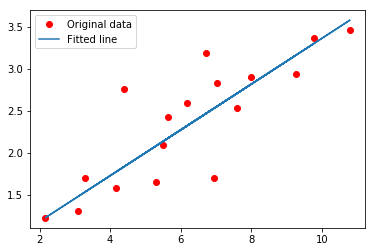

In [24]:
with tf.Session() as sess:
    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, final_w * train_X + final_b, label='Fitted line')
    plt.legend()
    plt.show()

## Logistic Regression 

Logistic regression refers to a classifier that classifies an observation into one of two classes, and multinomial logistic regression is used when classifying into more than two classes, but the two terms are used interchangebly. We will look at an example where we want to classify handwritten digits into one of 10 classes: 0-9

The logistic regression model works in a similar fashion to a linear regression model except that the final sum of the product between the weights and dependent variable is passed through a function that transforms the input to lie between 0 and 1. This function is called the logistic function, giving the model its name.

We can create a logistic regressor in the same way as we created a linear regression computational graph.

We will use the MNIST database of <a href=http://yann.lecun.com/exdb/mnist/>handwritten digits</a> for this example.

TensorFlow provides easy access to some sample data sets. We can access the mnist dataset a TensorFlow dataset that contains 60,000 training images and their corresponding labels as well as 10,000 testing images and their corresponding labels.
- Each image is 28 pixels by 28 pixels
- Each image represents a digit between 0 and 9
- The labels are one-hot encoded => each label is a 1x10 vector

In [26]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


#### Logistic regression model specification:
\begin{equation*}
y = g(\Theta^{T} X) = g(\sum_{i=0}^{n} \theta_{i} x_{i}) \text{ where } x_0 = 1
\end{equation*}
- g is the <a href = https://en.wikipedia.org/wiki/Softmax_function>softmax function</a>, an extension of the logistic function to multiple dimensions
    - It squashes all dimensions of a vector input to lie between 0-1
    - Ensures that the sum of the magnitudes of each dimension is 1

- Tensorflow provides an implementation of the softmax function, which we can use.

- The logistic regression model is trained by minimizing a cross-entropy loss.

New concepts:
5. Softmax : https://www.tensorflow.org/api_docs/python/tf/nn/softmax
6. Reduce_mean : https://www.tensorflow.org/api_docs/python/tf/reduce_mean

In [54]:
# Specifying the model
# tf Graph Input
x = tf.placeholder(dtype = tf.float32, shape = [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(dtype = tf.float32, shape = [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(initial_value = tf.zeros([784, 10]))
b = tf.Variable(initial_value = tf.zeros([10]))


# Construct model
prediction = tf.nn.softmax(tf.add(b, tf.matmul(x, W))) # Softmax

#lamb = 0.01 #Uncomment this line to enable regularization

# Minimize error using cross entropy loss
# reduce_mean calculates the mean across dimensions of a tensor
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), axis=1) # + lamb * (tf.nn.l2_loss(W) + tf.nn.l2_loss(b)))
                     )# uncomment on the line above to enable regularization and delete the paranthesis on this line
                      
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [28]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 5

This time, we will use Batch Gradient Descent to optimize our loss function. However, Tensorflow is agnostic to the difference between Stochastic and Batch gradient descent. The only difference is in how we have defined our input placeholders in our computational graph and what we pass to the feed_dict parameter when we run the optimizer in a session.

In [55]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_loss = 0.
        total_batch = int(mnist.train.num_examples/batch_size) # there would be 600 batches
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, loss], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_loss += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "loss=", "{:.9f}".format(avg_loss))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0005 loss= 0.465386575
Epoch: 0010 loss= 0.391811254
Epoch: 0015 loss= 0.363482976
Epoch: 0020 loss= 0.345590337
Epoch: 0025 loss= 0.332802501
Optimization Finished!
Accuracy: 0.8883333


The advantages of Tensorflow lie in its extensability and ease of writing complex machine learning models with comparitive simplicity. We can modify the above Logistic regression model into a regularized logistic regression model with the simple addition of 2 code fragments.  

```python
lamb = 0.01 #This is the hyperparameter that controls the strength of the regularization

# Minimize error using cross entropy loss
# reduce_mean calculates the mean across dimensions of a tensor
loss = tf.reduce_mean(-tf.reduce_sum(y*tf.log(prediction), axis=1)  + lamb * (tf.nn.l2_loss(W) + tf.nn.l2_loss(b)))
                     
```
We use an L2 regularizer by just applying TF's inbuilt L2 regularizer on the parameters of our models